# Water quality prediction

In [ ]:
import pandas as pd

In [ ]:
train_data_url = 'https://drive.google.com/uc?id=1bJjSZDAfn7UbX2xt0I-VmsLAjk9n7IXh'
kaggle_test_url = 'https://drive.google.com/uc?id=1SH_Xo_MjrLuMICFmpD4exHFrN8YbeRE8'
df = pd.read_csv(train_data_url, delimiter=',')
kaggle_test = pd.read_csv(kaggle_test_url, delimiter=',')

In [ ]:
df.head()

,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,Coli-like-bacteria-Colilert_2019,Coli-like-bacteria-Colilert_2020,...,Taste-ball-units_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020,compliance_2021
0,0.0,0.0,0.05,0.05,0.000,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.6,0.2,7.80,7.60,0,0,0
1,0.0,0.0,0.05,0.05,0.000,0.000,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,7.30,7.10,0,0,0
2,0.0,10.0,0.05,0.24,0.000,0.100,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,7.80,7.70,0,0,0
3,0.0,0.0,0.09,0.05,0.641,0.932,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.5,0.5,7.44,7.58,0,0,0
4,0.0,0.0,0.06,0.05,0.000,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2,44.0,7.70,8.00,0,1,0


Preprocessing

In [ ]:
df = df.fillna(0)
df = df.drop('station_id', axis=1)

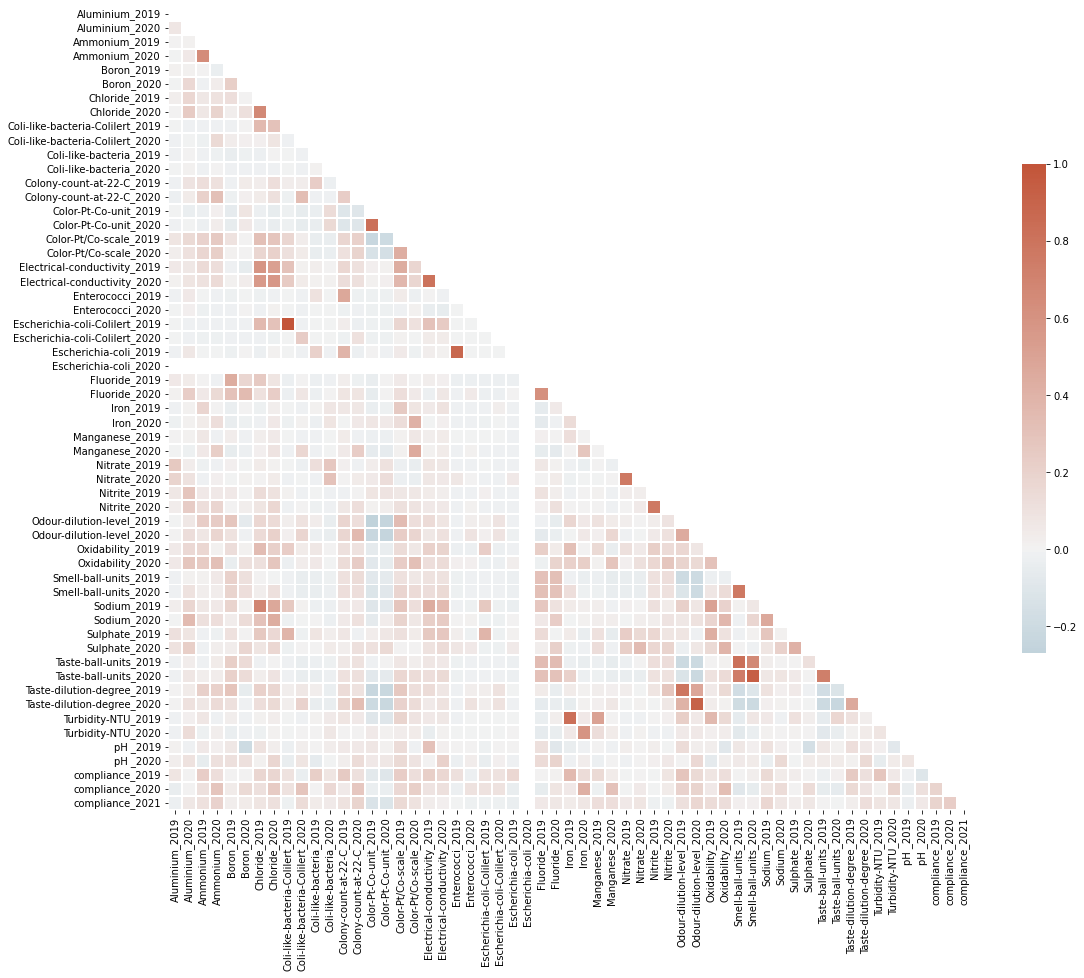

In [ ]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5})

Models

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('compliance_2021', axis=1)
y = df['compliance_2021']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8636363636363636

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8295454545454546

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

param = {'eval_metric': 'auc', 'num_class': 1, 'objective': 'binary:logistic'}
eval_list = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(param, dtrain, 500, eval_list, early_stopping_rounds=50, verbose_eval=True)

[0]	train-auc:0.860956	eval-auc:0.594846
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.904984	eval-auc:0.608553
[2]	train-auc:0.916201	eval-auc:0.586623
[3]	train-auc:0.92574	eval-auc:0.547149
[4]	train-auc:0.943139	eval-auc:0.605263
[5]	train-auc:0.970575	eval-auc:0.616776
[6]	train-auc:0.978499	eval-auc:0.645833
[7]	train-auc:0.991455	eval-auc:0.643092
[8]	train-auc:0.994594	eval-auc:0.636513
[9]	train-auc:0.996893	eval-auc:0.616228
[10]	train-auc:0.998136	eval-auc:0.615132
[11]	train-auc:0.998509	eval-auc:0.607456
[12]	train-auc:0.99826	eval-auc:0.601974
[13]	train-auc:0.998819	eval-auc:0.60307
[14]	train-auc:0.999379	eval-auc:0.607456
[15]	train-auc:0.999751	eval-auc:0.619518
[16]	train-auc:0.999938	eval-auc:0.642544
[17]	train-auc:1	eval-auc:0.64364
[18]	train-auc:1	eval-auc:0.635965
[19]	train-auc:1	eval-auc:0.631579
[20]	train-auc:1	eval-auc:0.628289
[21]	train-auc:1	ev

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

param = {'eval_metric': 'error', 'num_class': 1, 'objective': 'binary:logistic'}
eval_list = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(param, dtrain, 500, eval_list, early_stopping_rounds=50, verbose_eval=True)

[0]	train-error:0.079545	eval-error:0.215909
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 50 rounds.
[1]	train-error:0.068182	eval-error:0.204545
[2]	train-error:0.065341	eval-error:0.193182
[3]	train-error:0.051136	eval-error:0.193182
[4]	train-error:0.042614	eval-error:0.193182
[5]	train-error:0.036932	eval-error:0.170455
[6]	train-error:0.034091	eval-error:0.159091
[7]	train-error:0.025568	eval-error:0.159091
[8]	train-error:0.025568	eval-error:0.159091
[9]	train-error:0.022727	eval-error:0.159091
[10]	train-error:0.017045	eval-error:0.170455
[11]	train-error:0.014205	eval-error:0.170455
[12]	train-error:0.011364	eval-error:0.170455
[13]	train-error:0.008523	eval-error:0.159091
[14]	train-error:0.008523	eval-error:0.170455
[15]	train-error:0.008523	eval-error:0.159091
[16]	train-error:0.005682	eval-error:0.170455
[17]	train-error:0.005682	eval-error:0.170455
[18]	train-error:0.005682	eval-error: